K means Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans,DBSCAN
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
digits = load_digits()
X = digits.data

In [5]:
#standardize data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [7]:
# 1. Elbow Method for Optimal K
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)


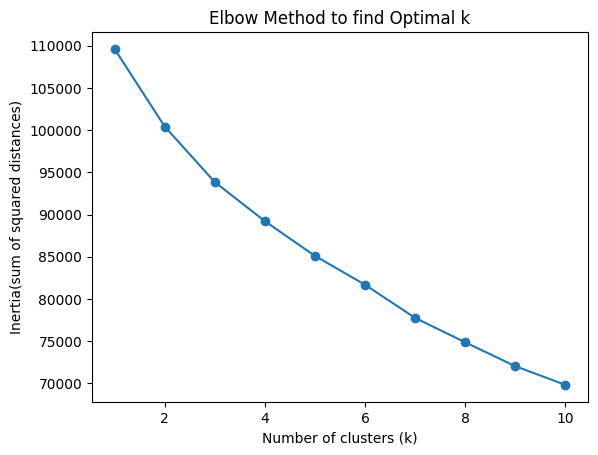

In [8]:
#plot Elbow method
plt.Figure(figsize=(8,5))
plt.plot(k_range,inertia,marker='o',linestyle='-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia(sum of squared distances)")
plt.title("Elbow Method to find Optimal k")
plt.show()

In [10]:
# 2. K-Means Clustering on Digits Dataset
optimal_k = 10  # Assume 10 from Elbow Method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters_kmeans = kmeans.fit_predict(x_scaled)


In [12]:
# Apply PCA for Visualization (2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_scaled)

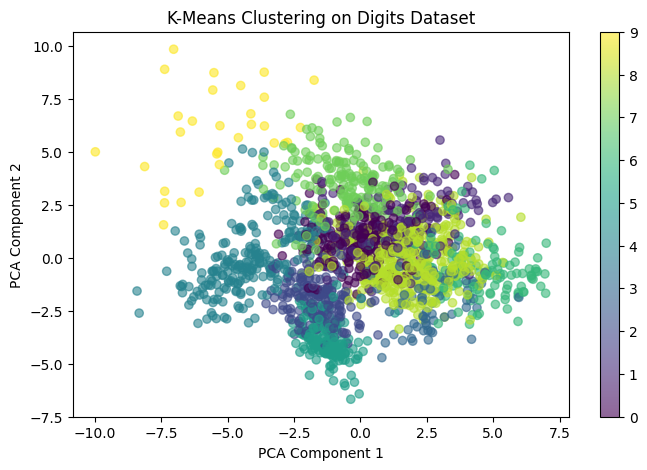

In [13]:
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_kmeans, cmap="viridis", alpha=0.6)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering on Digits Dataset")
plt.colorbar()
plt.show()


In [14]:
# 3. DBSCAN Clustering
dbscan = DBSCAN(eps=2, min_samples=5)
clusters_dbscan = dbscan.fit_predict(x_scaled)

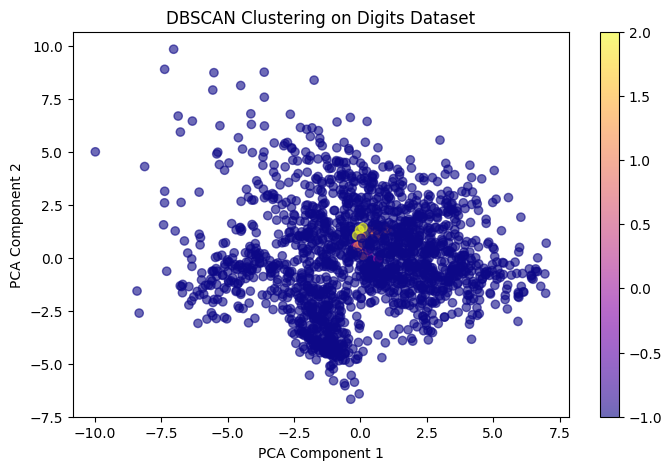

In [15]:
# Plot DBSCAN Clusters
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_dbscan, cmap="plasma", alpha=0.6)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("DBSCAN Clustering on Digits Dataset")
plt.colorbar()
plt.show()

In [16]:
# Compare the number of clusters found
num_clusters_kmeans = len(set(clusters_kmeans))
num_clusters_dbscan = len(set(clusters_dbscan)) - (1 if -1 in clusters_dbscan else 0)  # Ignore noise (-1)


In [17]:
print(f"K-Means Clusters: {num_clusters_kmeans}")
print(f"DBSCAN Clusters (excluding noise): {num_clusters_dbscan}")

K-Means Clusters: 10
DBSCAN Clusters (excluding noise): 3
